**🧠 Airport Routing Optimization with Neural Networks**

This notebook builds a machine learning model to predict airport routing behavior based on transport leg durations and logistics features. It uses a masked logistics dataset with multiple transport legs and airport segments.

🔍 Objective
****To predict the airport ID (i1_dep_1_place) for a transport leg based on timing data such as planned and actual durations across multiple segments (check-in, departure, arrival, and delivery).

🔗 Workflow Overview
Data Cleaning

Handles missing values and filters out rare target classes

Converts all feature columns to numeric types

Exploratory Data Analysis (EDA)

Target class distribution

Feature correlation heatmap

ANOVA F-score feature selection

Feature Engineering

Selects top 10 most informative features using SelectKBest + f_classif

Modeling

A neural network (MLP) built with Keras & TensorFlow

Trained with categorical cross-entropy for multiclass classification

Performance Visualization

Accuracy and loss trends over 30 epochs

Evaluation on test data

Route Visualization

Uses NetworkX to build a synthetic 2D graph of 100 sample routes from i1_dep_1_place to i1_rcf_1_place

Randomly assigns coordinates to anonymized airport IDs

Arrows indicate direction of freight movement

🛫 Outcome
This notebook demonstrates how to preprocess real-world logistics data, identify predictive patterns, and build a neural network that classifies routing destinations. It ends with a synthetic visualization of routing paths to offer interpretable insights.



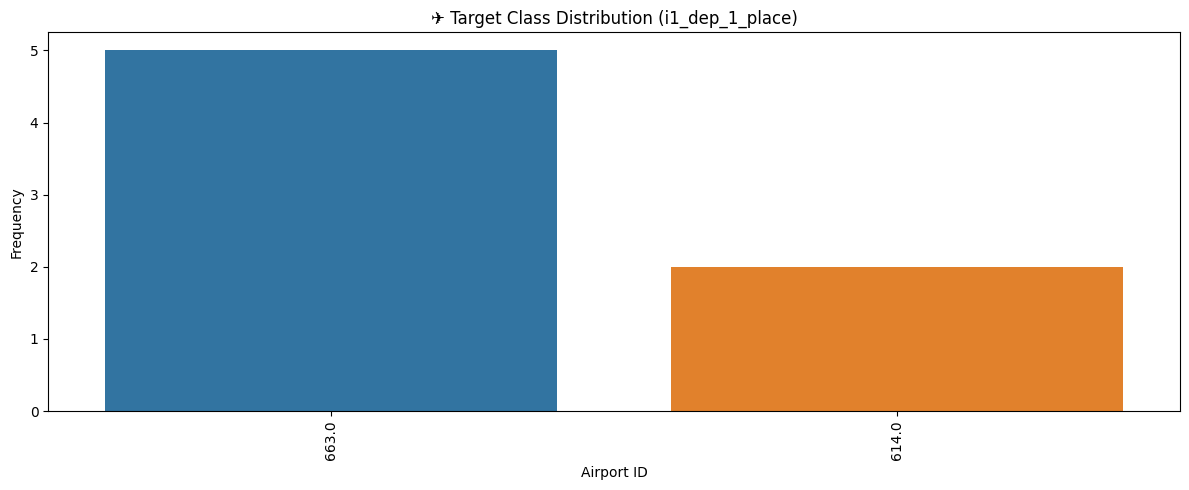

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


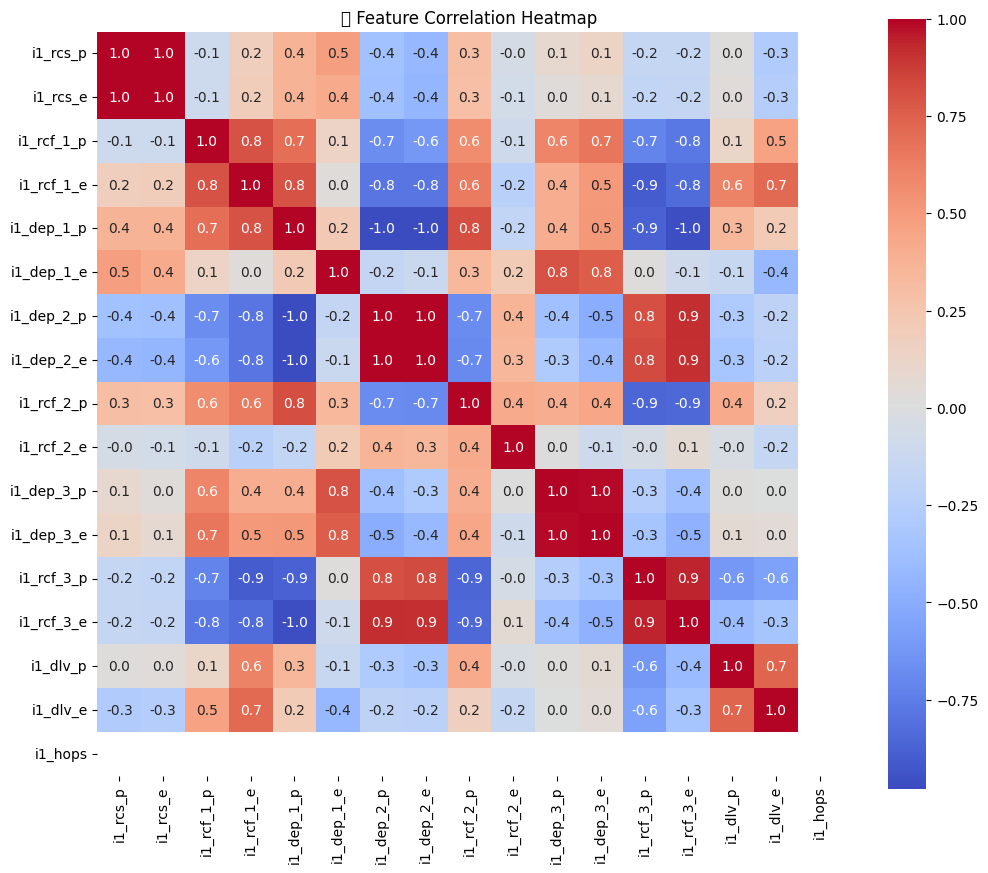

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/tmp/ipykernel_31/2878449488.py:85: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


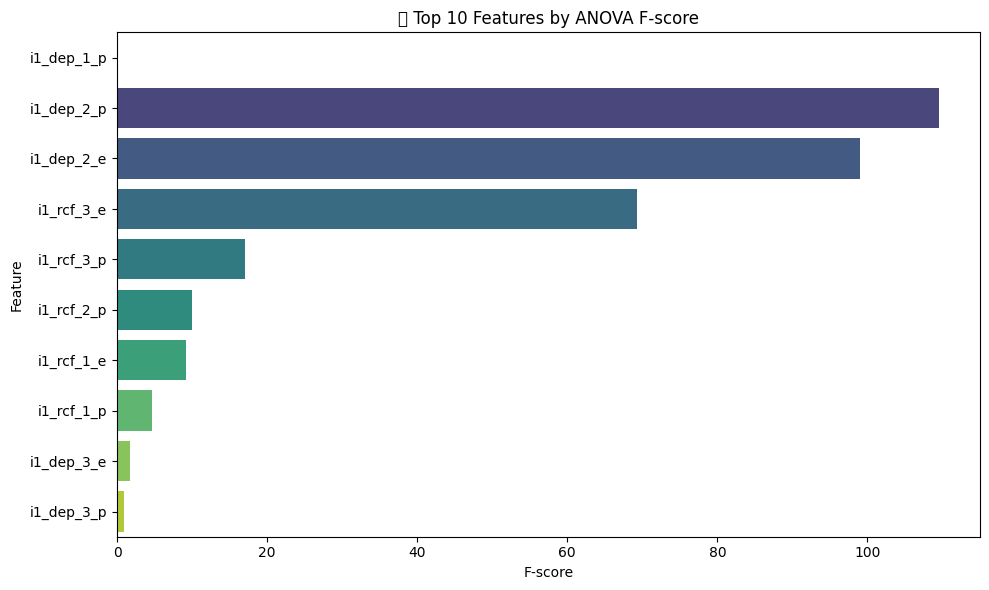

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Selected features: ['i1_rcf_1_p', 'i1_rcf_1_e', 'i1_dep_1_p', 'i1_dep_2_p', 'i1_dep_2_e', 'i1_rcf_2_p', 'i1_dep_3_p', 'i1_dep_3_e', 'i1_rcf_3_p', 'i1_rcf_3_e']
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4000 - loss: 0.7252 - val_accuracy: 0.5000 - val_loss: 1.4660
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0000e+00 - loss: 1.0074 - val_accuracy: 0.5000 - val_loss: 1.3022
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4000 - loss: 0.8809 - val_accuracy: 0.5000 - val_loss: 1.1441
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6000 - loss: 0.7363 - val_accuracy: 0.5000 - val_loss: 0.9920
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6000 - loss: 0.6754 - val_accuracy: 0.5000 - val_loss: 0.8650
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8000 - loss: 0.5081 - val_accuracy: 0.5000 - val_loss: 0.7481
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8000 - loss: 0.5864 - v

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


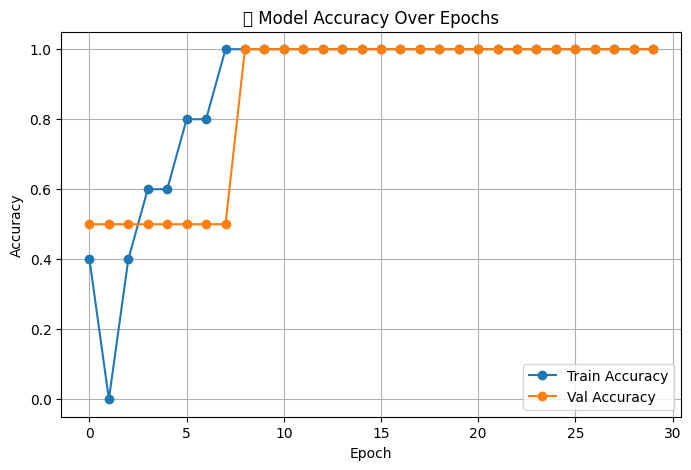

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


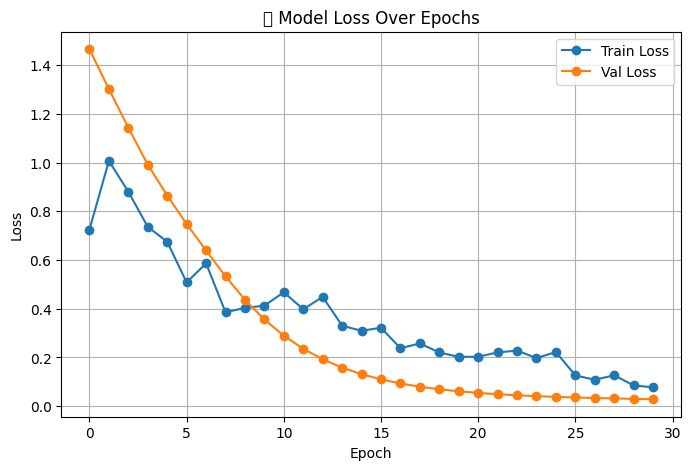

/tmp/ipykernel_31/2878449488.py:175: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


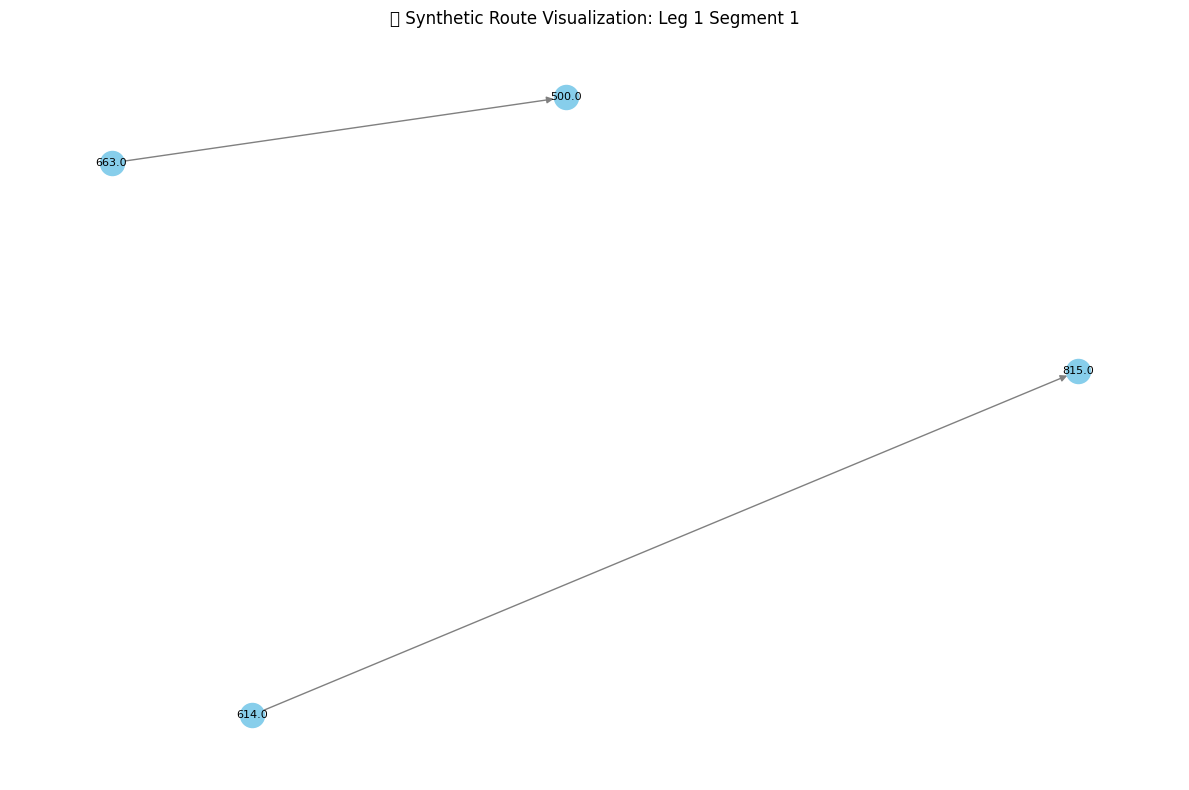

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# ----------------------------------------
# 🧹 Data Loading & Cleaning
# ----------------------------------------

# Load dataset
df = pd.read_csv("/kaggle/input/cargo-2000-dataset/c2k_data_comma.csv")

# Full feature list + route-related columns
full_feature_cols = [
    'i1_rcs_p', 'i1_rcs_e', 'i1_rcf_1_p', 'i1_rcf_1_e',
    'i1_dep_1_p', 'i1_dep_1_e', 'i1_dep_2_p', 'i1_dep_2_e',
    'i1_rcf_2_p', 'i1_rcf_2_e', 'i1_dep_3_p', 'i1_dep_3_e',
    'i1_rcf_3_p', 'i1_rcf_3_e', 'i1_dlv_p', 'i1_dlv_e', 'i1_hops'
]
target_col = 'i1_dep_1_place'
route_cols = ['i1_rcf_1_place']  # for route plotting

# Clean and convert
df = df[full_feature_cols + route_cols + [target_col]].replace('?', np.nan).dropna()
df = df.apply(pd.to_numeric)

# Filter out rare airport classes
vc = df[target_col].value_counts()
valid_classes = vc[vc >= 2].index
df = df[df[target_col].isin(valid_classes)]

# ----------------------------------------
# 📊 Data Visualizations
# ----------------------------------------

# Target class distribution
plt.figure(figsize=(12, 5))
sns.countplot(x=target_col, data=df, order=df[target_col].value_counts().index)
plt.title("✈️ Target Class Distribution (i1_dep_1_place)")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Airport ID")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df[full_feature_cols].corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", square=True)
plt.title("🔥 Feature Correlation Heatmap")
plt.show()

# ----------------------------------------
# 📦 Feature Engineering & Selection
# ----------------------------------------

X_raw = df[full_feature_cols]
y_raw = df[target_col]

# Encode the target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)
num_classes = len(np.unique(y))

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_raw, y)

# Plot top feature scores
f_scores = selector.scores_
feature_scores = pd.Series(f_scores, index=full_feature_cols).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores.values[:10], y=feature_scores.index[:10], palette="viridis")
plt.title("⭐ Top 10 Features by ANOVA F-score")
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

selected_features = [full_feature_cols[i] for i in selector.get_support(indices=True)]
print("✅ Selected features:", selected_features)

# ----------------------------------------
# 🔁 Train-Test Split & Normalization
# ----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ----------------------------------------
# 🤖 Model Definition & Training
# ----------------------------------------

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                    epochs=30, batch_size=32, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"\n🎯 Test Accuracy with Selected Features: {accuracy:.2%}")

# ----------------------------------------
# 📈 Training History Plots
# ----------------------------------------

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title("📈 Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title("📉 Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------
# 🛫 Synthetic Route Visualization (Leg 1)
# ----------------------------------------

# Sample route pairs (i1_dep_1_place → i1_rcf_1_place)
df_routes = df[['i1_dep_1_place', 'i1_rcf_1_place']].dropna().copy()
sample_size = min(100, len(df_routes))
df_routes = df_routes.sample(n=sample_size, random_state=42)

# Create route graph
G = nx.DiGraph()
edges = list(zip(df_routes['i1_dep_1_place'], df_routes['i1_rcf_1_place']))
G.add_edges_from(edges)

# Assign fake coordinates for visual clarity
np.random.seed(42)
nodes = set(df_routes['i1_dep_1_place']).union(df_routes['i1_rcf_1_place'])
positions = {n: (np.random.rand(), np.random.rand()) for n in nodes}

# Plot graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, positions, node_size=300, node_color='skyblue')
nx.draw_networkx_edges(G, positions, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, positions, font_size=8)
plt.title("🛫 Synthetic Route Visualization: Leg 1 Segment 1")
plt.axis("off")
plt.tight_layout()
plt.show()
